In [6]:
import pandas as pd
import pycaret
import seaborn as sns
from pycaret.clustering import *
from pycaret.clustering import ClusteringExperiment
from sklearn.feature_selection import SelectFpr, chi2
from sklearn.feature_selection import f_classif

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.feature_selection import SelectFdr, chi2
import warnings
warnings.filterwarnings("ignore")


In [7]:
MainDataset = pd.read_csv("./processed.hungarian.csv", sep=',', na_values='?',
                          names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
MainDataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [8]:

thal_Average = MainDataset['thal'].mean()
chol_Average = MainDataset['chol'].mean()
trestbps_Average = MainDataset['trestbps'].mean()
fbs_Average = MainDataset['fbs'].mean()
restecg_Average = MainDataset['restecg'].mean()
thalach_Average = MainDataset['thalach'].mean()
exang_Average = MainDataset['exang'].mean()
slope_Average = MainDataset['slope'].mean()
ca_Average = MainDataset['ca'].mean()


In [9]:
# EDA on the NAN values

MainDataset['thal'] = MainDataset['thal'].fillna(thal_Average)
MainDataset['trestbps'] = MainDataset['trestbps'].fillna(trestbps_Average)
MainDataset['chol'] = MainDataset['chol'].fillna(chol_Average)
MainDataset['fbs'] = MainDataset['fbs'].fillna(fbs_Average)
MainDataset['restecg'] = MainDataset['restecg'].fillna(restecg_Average)
MainDataset['thalach'] = MainDataset['thalach'].fillna(thalach_Average)
MainDataset['exang'] = MainDataset['exang'].fillna(exang_Average)
MainDataset['slope'] = MainDataset['slope'].fillna(slope_Average)
MainDataset['ca'] = MainDataset['ca'].fillna(ca_Average)


In [10]:
MainDataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
MainDataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857,1
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857,1
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.642857,1
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,1


In [12]:
MainDataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [13]:
# converting the object types

MainDataset['trestbps'] = MainDataset['trestbps'].astype('int')
MainDataset['chol'] = MainDataset['chol'].astype('int')
MainDataset['fbs'] = MainDataset['fbs'].astype('int')
MainDataset['restecg'] = MainDataset['restecg'].astype('int')
MainDataset['chol'] = MainDataset['chol'].astype('int')
MainDataset['thalach'] = MainDataset['thalach'].astype('int')
MainDataset['exang'] = MainDataset['exang'].astype('int')
MainDataset['oldpeak'] = MainDataset['oldpeak'].astype('int')
MainDataset['slope'] = MainDataset['slope'].astype('int')
MainDataset['ca'] = MainDataset['ca'].astype('int')
MainDataset['thal'] = MainDataset['thal'].astype('int')


In [14]:
MainDataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0,1,0,5,0
1,29,1,2,120,243,0,0,160,0,0,1,0,5,0
2,29,1,2,140,250,0,0,170,0,0,1,0,5,0
3,30,0,1,170,237,0,1,170,0,0,1,0,6,0
4,31,0,2,100,219,0,1,150,0,0,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2,1,0,5,1
290,54,0,3,130,294,0,1,100,1,0,2,0,5,1
291,56,1,4,155,342,1,0,150,1,3,2,0,5,1
292,58,0,2,180,393,0,0,110,1,1,2,0,7,1


In [15]:
# Renaming the columns
MainDataset = MainDataset.rename(columns={"cp": "chest_pain_type", "trestbps": "resting_blood_pressure", "chol": "cholesterol", "fbs": "fasting_blood_sugar",
                                 "restecg": "rest_ecg", "thalach": "thal_pain_type ", "exang": "exercise_induced_angina", "oldpeak": " ", "slope": "st_slop ", "ca": "", "thal": "thalassemia"})
MainDataset


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,thal_pain_type,exercise_induced_angina,,st_slop,,thalassemia,target
0,28,1,2,130,132,0,2,185,0,0,1,0,5,0
1,29,1,2,120,243,0,0,160,0,0,1,0,5,0
2,29,1,2,140,250,0,0,170,0,0,1,0,5,0
3,30,0,1,170,237,0,1,170,0,0,1,0,6,0
4,31,0,2,100,219,0,1,150,0,0,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2,1,0,5,1
290,54,0,3,130,294,0,1,100,1,0,2,0,5,1
291,56,1,4,155,342,1,0,150,1,3,2,0,5,1
292,58,0,2,180,393,0,0,110,1,1,2,0,7,1


In [16]:
# Detecting The Outliers


In [17]:
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                       'rest_ecg', 'exercise_induced_angina', 'thalassemia']

continues_columns = ['age', 'resting_blood_pressure',
                     'cholesterol', 'thalassemia', 'target']


In [18]:
for col in categorical_columns:
    print(MainDataset[col].unique())


[1 0]
[2 1 3 4]
[0 1]
[2 0 1]
[0 1]
[5 6 3 7]


In [19]:
for col in continues_columns:
    print(MainDataset[col].unique())


[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66]
[130 120 140 170 100 105 110 125 150  98 112 145 190 160 115 142 180 132
 135 108 124 113 122  92 118 106 200 138 136 128 155]
[132 243 250 237 219 198 225 254 298 161 214 220 160 167 308 264 166 340
 209 260 211 173 283 194 223 315 275 297 292 182 200 204 241 339 147 273
 307 289 215 281 184 245 291 295 269 196 268 228 358 201 249 266 186 207
 218 412 224 238 230 163 240 280 257 263 276 284 195 227 253 187 202 328
 168 216 129 190 188 179 210 272 180 100 259 468 274 320 221 309 312 171
 208 246 305 217 365 344 394 256 326 277 270 229  85 347 251 222 287 318
 213 294 193 271 156 267 282 117 466 247 226 265 206 288 303 338 248 306
 529 392 231 329 355 233 242 603 255 172 175 290 341 234 342 404 518 285
 279 388 164 336 491 205 212 331 393]
[5 6 3 7]
[0 1]


In [20]:
# Draw charts
import matplotlib.pyplot as plt
import itertools
# import squarify  -> draws treemap chart with better EDA explanations


<function matplotlib.pyplot.show(close=None, block=None)>

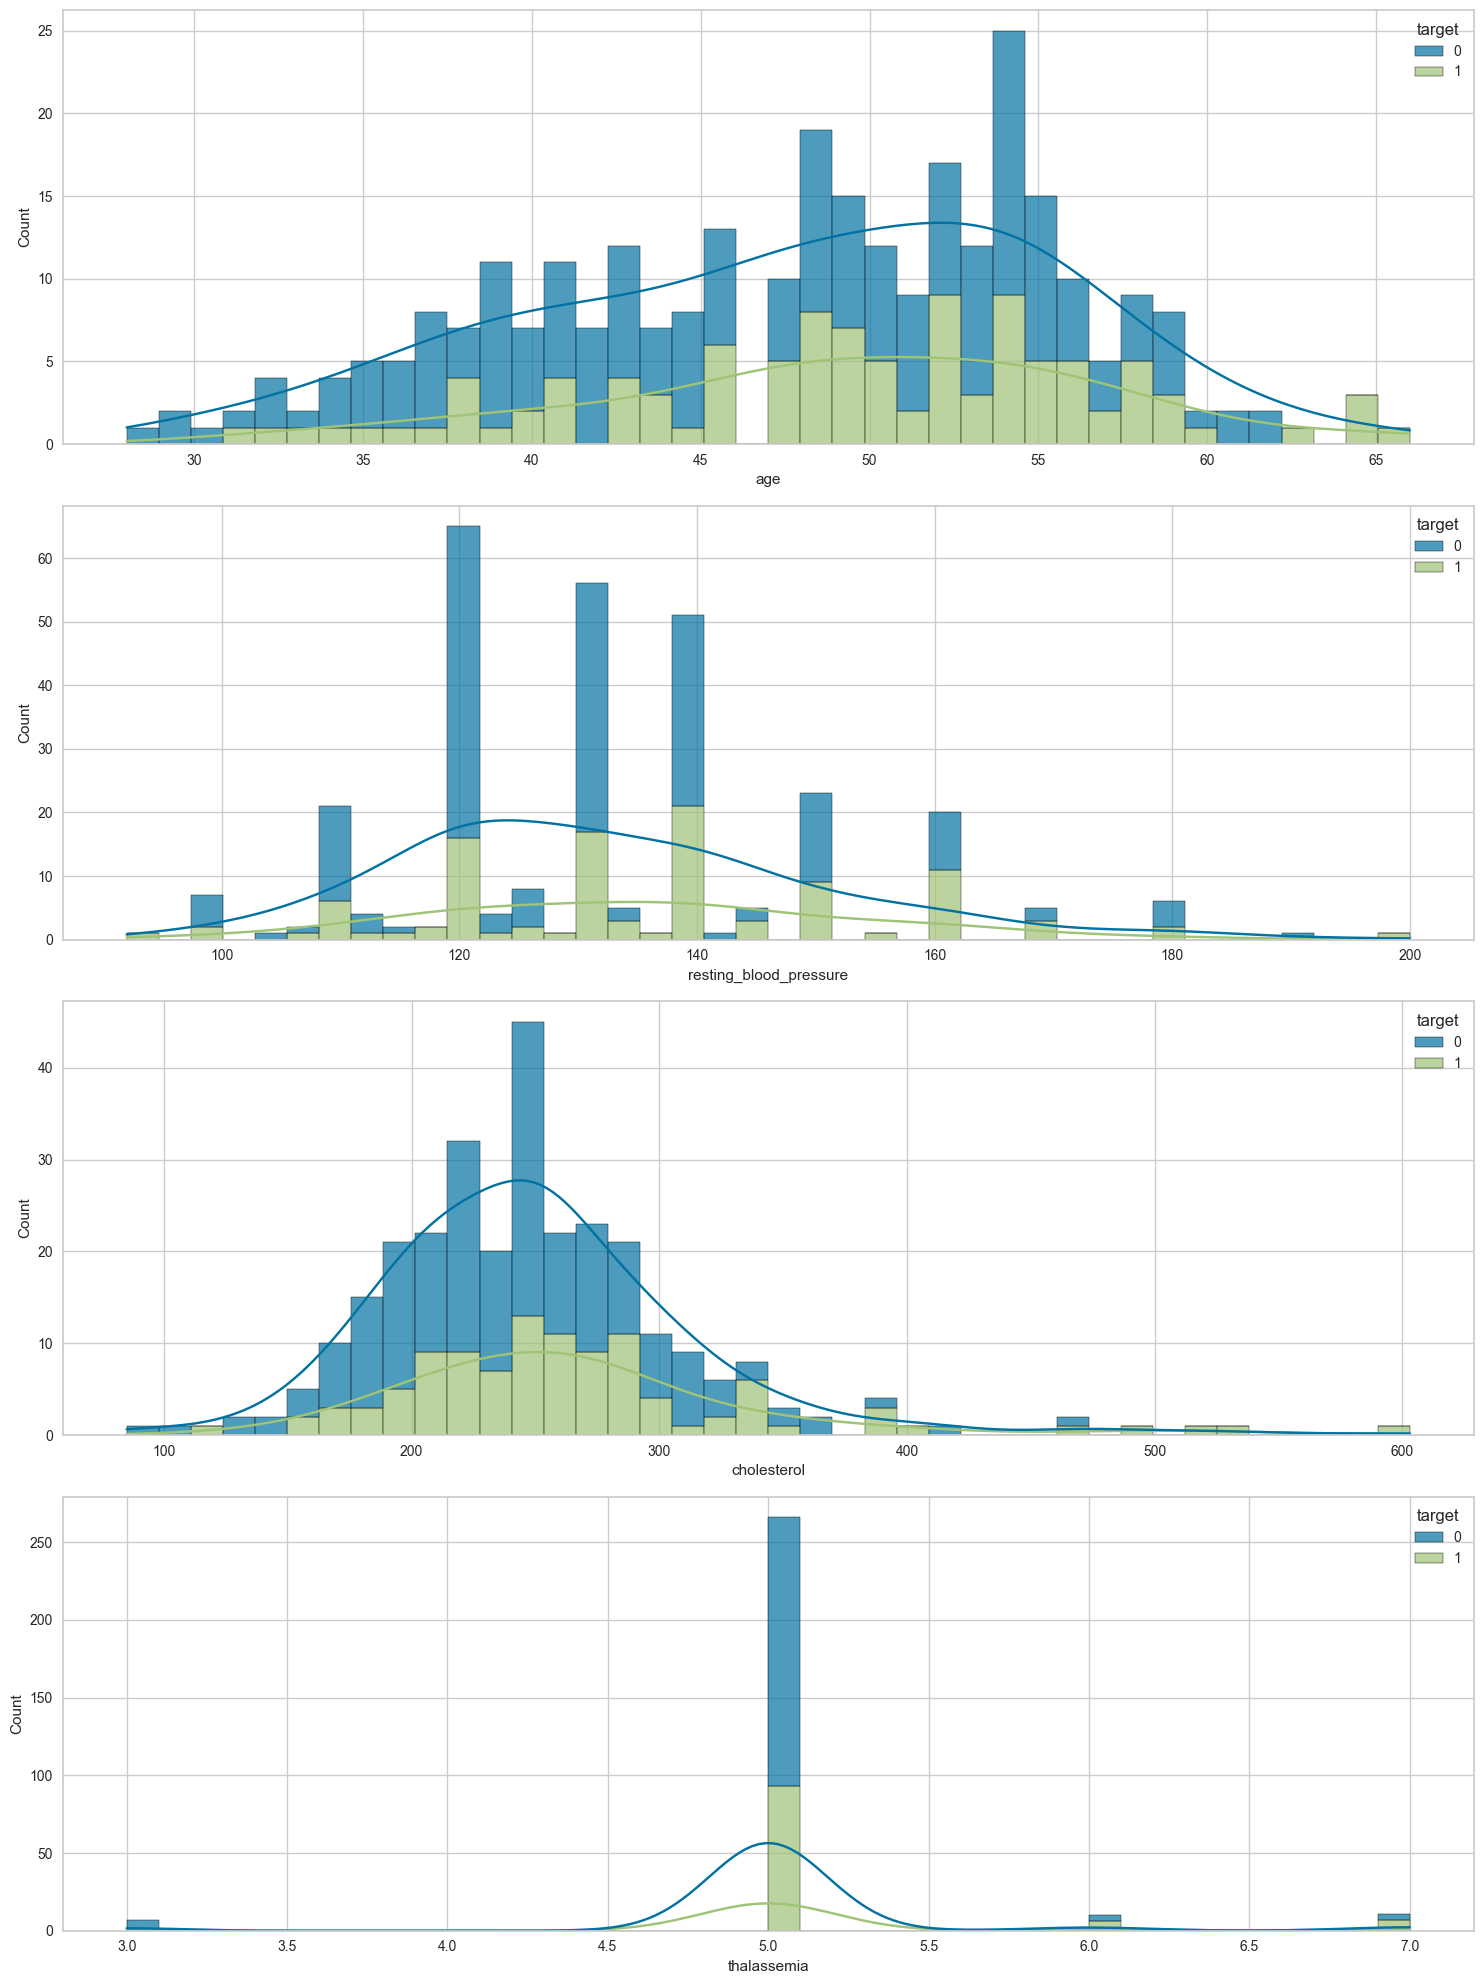

In [21]:
fig, axs = plt.subplots(4, figsize=(15, 20))

for i, col in enumerate([col for col in continues_columns if col != 'target']):
    sns.histplot(data=MainDataset, x=col, hue='target', kde=True,
                 ax=axs[i], alpha=0.7, multiple='stack', bins=40)

plt.tight_layout()
plt.show


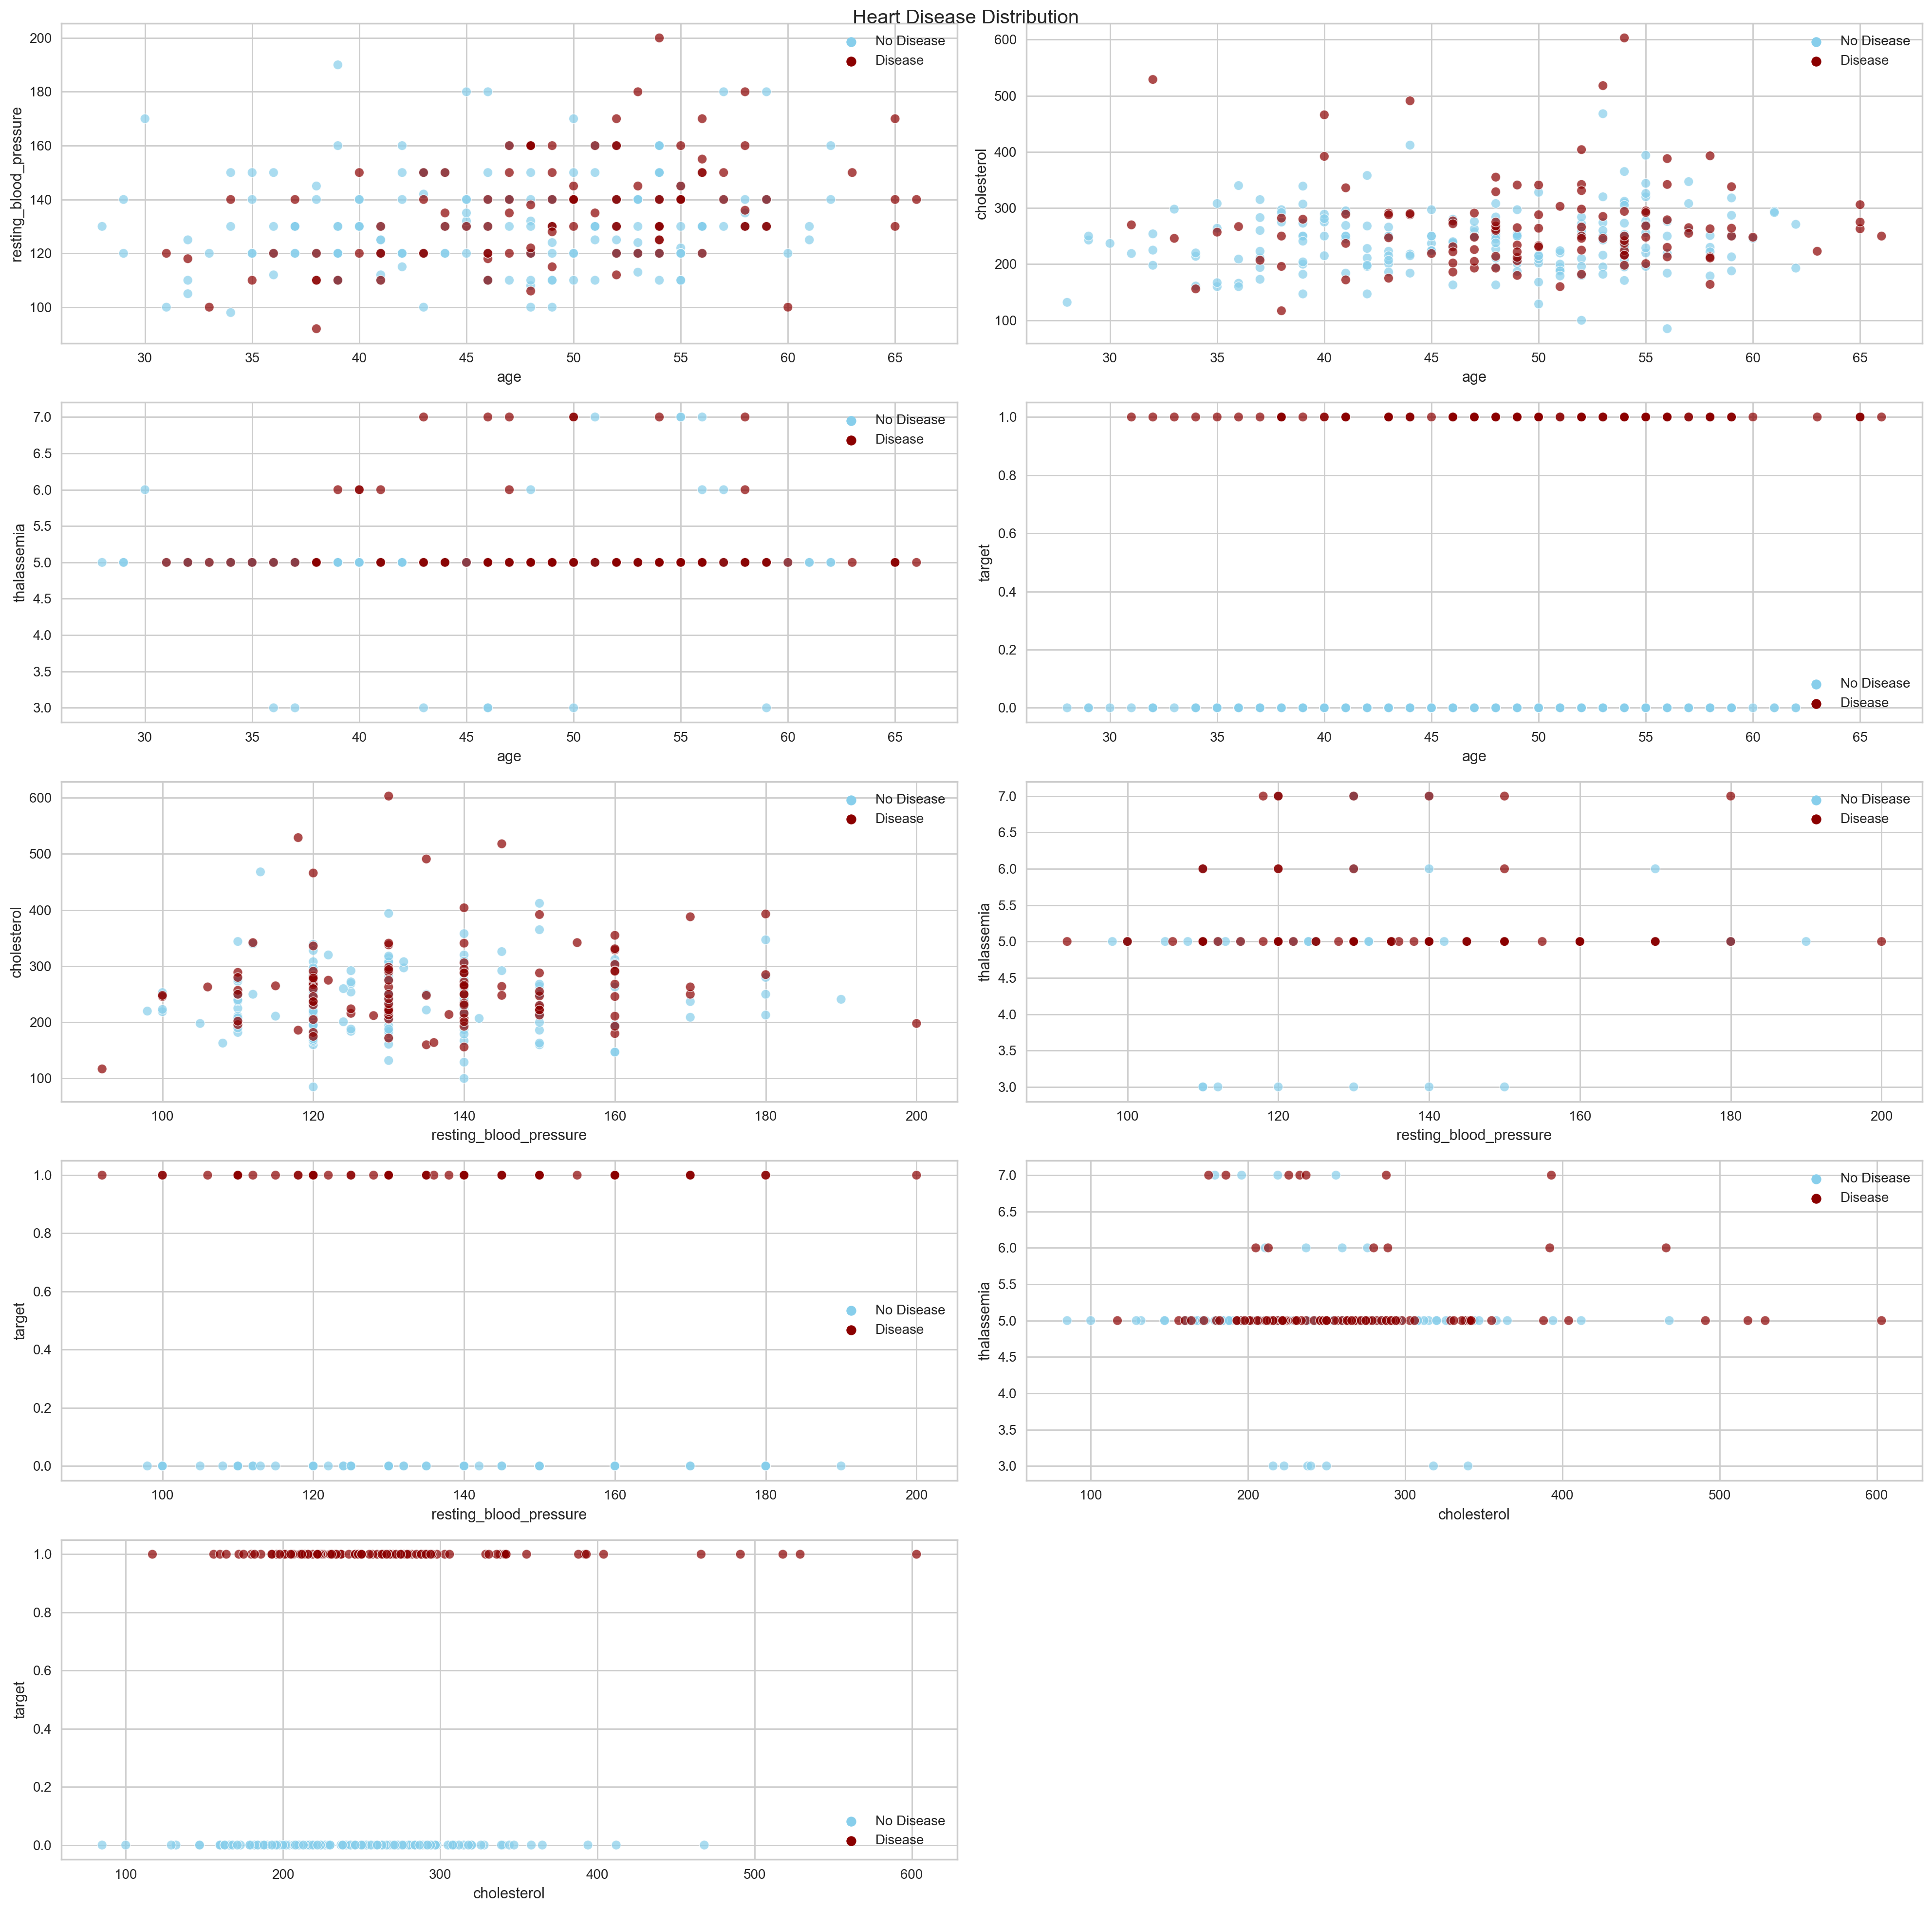

In [22]:
import itertools

columns = [col for col in continues_columns if col != 'taregt']

colors = {0: 'skyblue', 1: 'darkred'}

# this generates all the possible combination of two columsns!
combinations = itertools.combinations(columns, 2)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20), dpi=200)


# loop over the combinations and plot a scatter chart for the each one
for i, (x_col, y_col) in enumerate(combinations):
    row = i // 2
    col = i % 2

    sns.scatterplot(data=MainDataset, x=x_col, y=y_col,
                    hue='target', alpha=0.7, palette=colors, ax=axs[row][col])

    axs[row][col].set_xlabel(x_col)
    axs[row][col].set_ylabel(y_col)

    legend = axs[row][col].legend()
    legend.texts[0].set_text('No Disease')
    legend.texts[1].set_text('Disease')
    plt.suptitle("Heart Disease Distribution")
    axs.flatten()[-1].set_visible(False)

plt.tight_layout()


## EDA for other Section of the Data


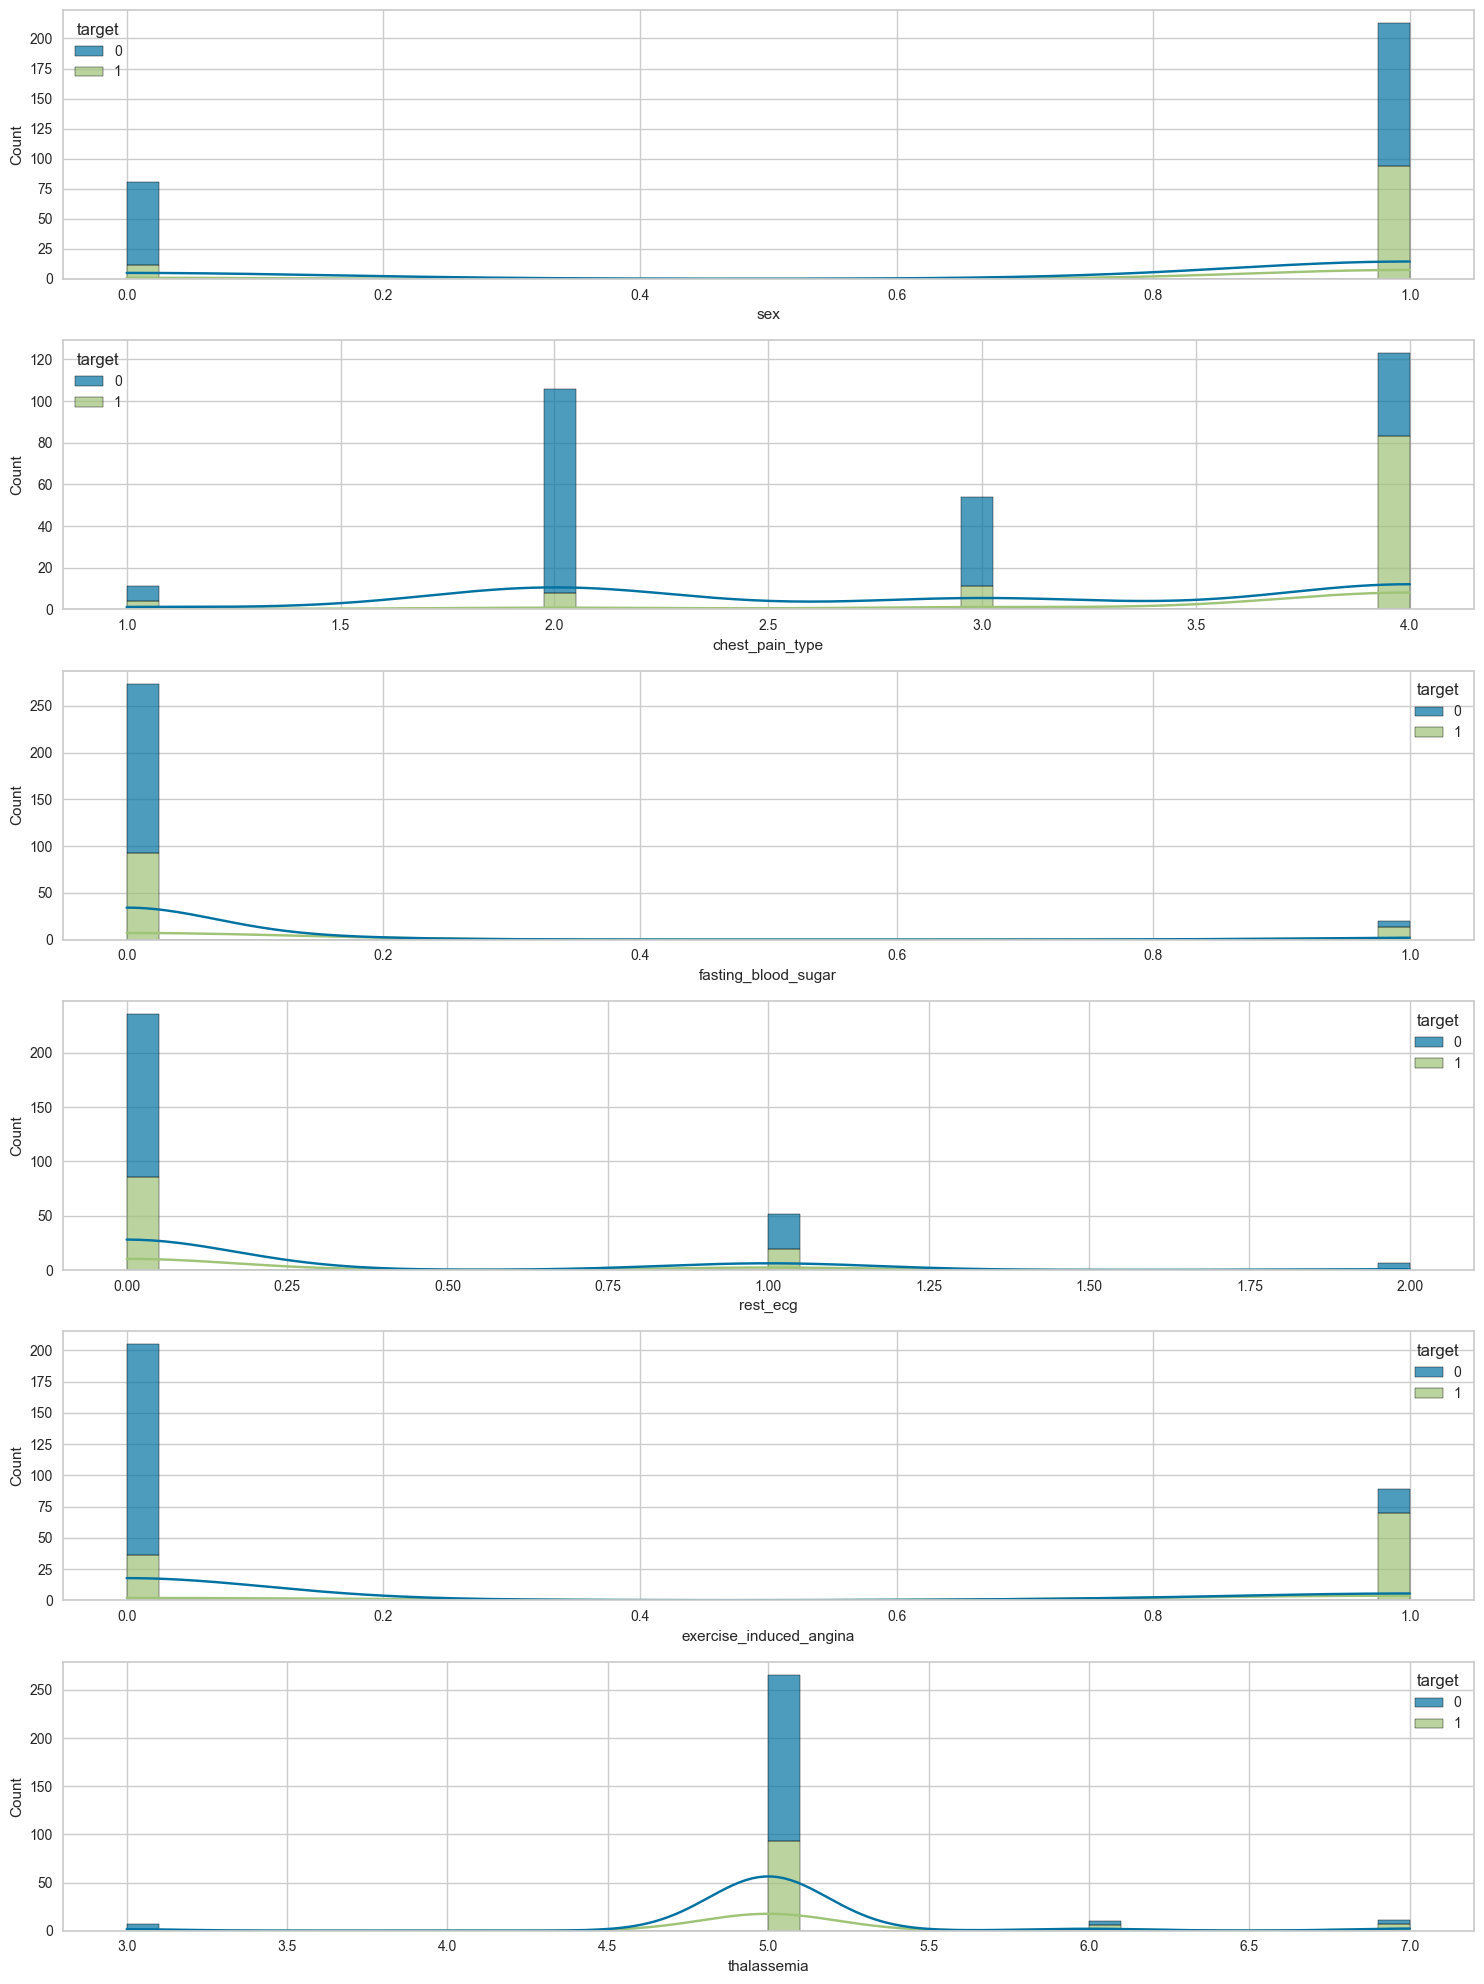

In [23]:

fig, axs = plt.subplots(6, figsize=(15, 20))

for i, col in enumerate([col for col in categorical_columns if col != 'target']):

    sns.histplot(data=MainDataset, x=col, hue='target', kde=True,
                 ax=axs[i], alpha=0.7, multiple='stack', bins=40)

plt.tight_layout()
plt.show()


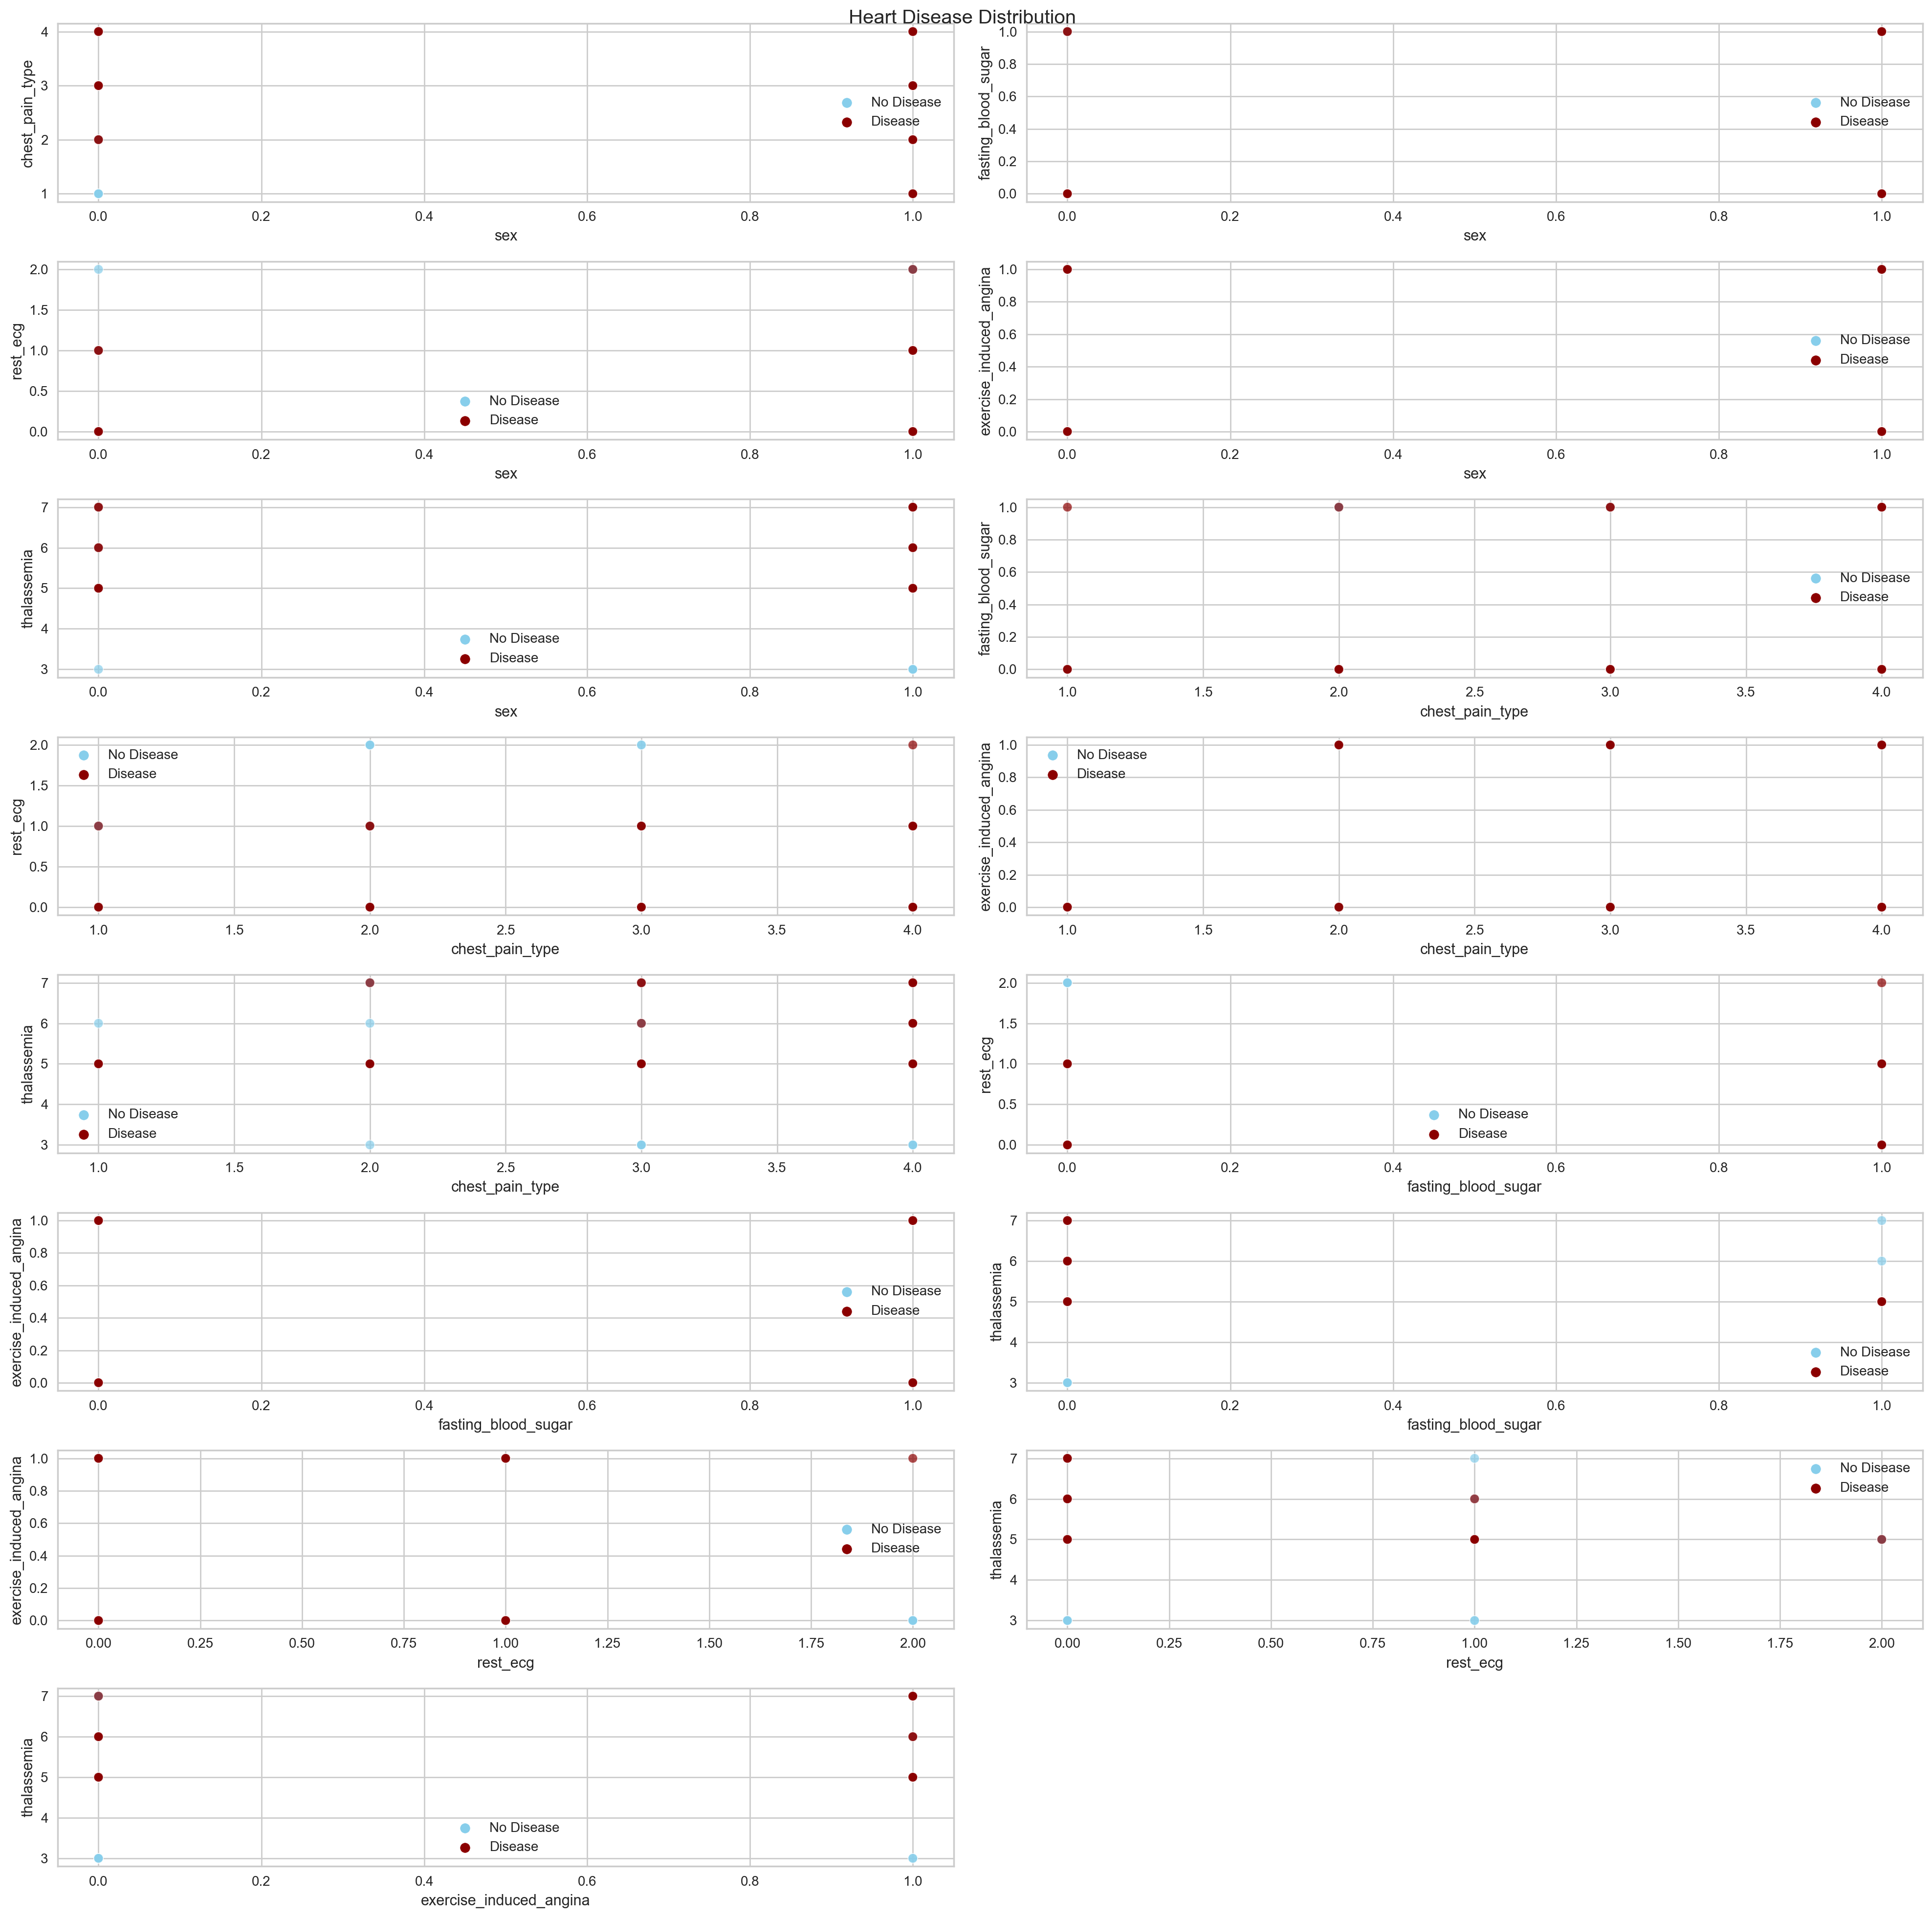

In [24]:
columns = [col for col in categorical_columns if col != 'target']

# this is the color dictionary
colors = {0: 'skyblue', 1: 'darkred'}


combinations = itertools.combinations(columns, 2)

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 20), dpi=200)

for i, (x_col, y_col) in enumerate(combinations):

    row = i // 2
    col = i % 2
    sns.scatterplot(data=MainDataset, x=x_col, y=y_col,
                    hue='target', alpha=0.7, palette=colors, ax=axs[row][col])

    axs[row][col].set_xlabel(x_col)
    axs[row][col].set_ylabel(y_col)
    legend = axs[row][col].legend()

    legend.texts[0].set_text('No Disease')
    legend.texts[1].set_text('Disease')
    plt.suptitle("Heart Disease Distribution")
    axs.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()


<AxesSubplot: >

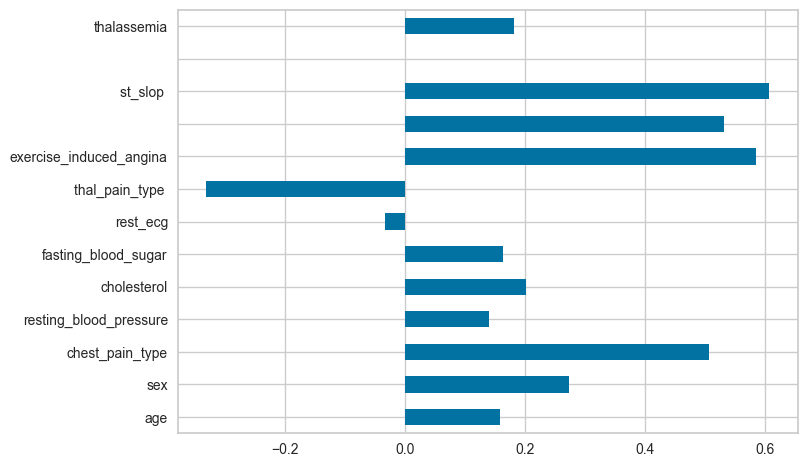

In [25]:
# This is another types of correlation plot, this version shows better insights

MainDataset.drop('target', axis=1).corrwith(
    MainDataset['target']).plot(kind='barh')


In [26]:
# spliting into train and test
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

X = MainDataset.drop('target', axis=1)
y = MainDataset['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [27]:
# we want now to scale the numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [28]:
# the pipliene

Classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier()
]


In [29]:
cross_validation_scores = pd.DataFrame(
    columns=['Cross_Validation Score'])

for clf in Classifiers:
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_score = cv_scores.mean()
    cross_validation_scores = cross_validation_scores.append(
        {'Classifier': clf.__class__.__name__, 'Cross_Validation Score': mean_score}, ignore_index=True)


In [30]:
cross_validation_scores


,Cross_Validation Score,Classifier
0,0.814634,LogisticRegression
1,0.814634,RandomForestClassifier
2,0.619512,SVC
3,0.824390,GaussianNB
4,0.609756,KNeighborsClassifier
5,0.668293,MLPClassifier
6,0.775610,AdaBoostClassifier
7,0.809756,BaggingClassifier
8,0.795122,ExtraTreesClassifier
9,0.790244,GradientBoostingClassifier


In [31]:
# testing with scaled data
base_scores = pd.DataFrame(
    columns=[])

for clf in Classifiers:
    clf.fit(X_train_scaled, y_train)
    train_score = accuracy_score(y_train, clf.predict(X_train_scaled))
    test_score = accuracy_score(y_test, clf.predict(X_test_scaled))

    base_scores = base_scores.append({'Classifier': clf.__class__.__name__,
                                     'Base-Train Accuracy': train_score, 'Base_test Accuracy': test_score}, ignore_index=True)


In [32]:
base_scores


,Classifier,Base-Train Accuracy,Base_test Accuracy
0,LogisticRegression,0.858537,0.853933
1,RandomForestClassifier,1.000000,0.786517
2,SVC,0.897561,0.831461
3,GaussianNB,0.843902,0.820225
4,KNeighborsClassifier,0.863415,0.797753
5,MLPClassifier,0.887805,0.842697
6,AdaBoostClassifier,0.936585,0.820225
7,BaggingClassifier,0.990244,0.797753
8,ExtraTreesClassifier,1.000000,0.831461
9,GradientBoostingClassifier,0.995122,0.820225


In [37]:
# combining the two Dataframes
pre_tuned_scores = pd.concat(
    [cross_validation_scores, base_scores.drop('Classifier', axis=1)], axis=1)
pre_tuned_scores


,Cross_Validation Score,Classifier,Base-Train Accuracy,Base_test Accuracy
0,0.814634,LogisticRegression,0.858537,0.853933
1,0.814634,RandomForestClassifier,1.000000,0.786517
2,0.619512,SVC,0.897561,0.831461
3,0.824390,GaussianNB,0.843902,0.820225
4,0.609756,KNeighborsClassifier,0.863415,0.797753
5,0.668293,MLPClassifier,0.887805,0.842697
6,0.775610,AdaBoostClassifier,0.936585,0.820225
7,0.809756,BaggingClassifier,0.990244,0.797753
8,0.795122,ExtraTreesClassifier,1.000000,0.831461
9,0.790244,GradientBoostingClassifier,0.995122,0.820225
